# Stock Price Prediction Using Long-Short Term Memory Neural Network

In [2]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0, 1))




In [3]:
import os
os.environ['http_proxy']='http://172.16.2.251:3128'
os.environ['https_proxy']='http://172.16.2.251:3128'

In [4]:
Amazon=yf.download('AMZN',period='max')


[*********************100%***********************]  1 of 1 completed


In [5]:
AMZN=pd.DataFrame(Amazon)
print('------------------------------------------------------------------------')
display(AMZN)
print('------------------------------------------------------------------------')

------------------------------------------------------------------------


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
...,...,...,...,...,...,...
2022-07-25,122.699997,123.639999,120.029999,121.139999,121.139999,50221300
2022-07-26,115.790001,118.150002,114.529999,114.809998,114.809998,67075100
2022-07-27,117.309998,121.900002,117.160004,120.970001,120.970001,61582000


------------------------------------------------------------------------


## From above dataframe, we have 6338 data points collected on daily basis.

In [6]:
print("-----------------------------------------")
print('First Data Point from:',AMZN.index[0])
print("-----------------------------------------")
print('Second Data Point from:',AMZN.index[-1])
print("-----------------------------------------")


-----------------------------------------
First Data Point from: 1997-05-15 00:00:00
-----------------------------------------
Second Data Point from: 2022-07-29 00:00:00
-----------------------------------------


## Copying Amazon DataFrame to New Variable for Analysis

In [7]:
df=AMZN.copy()
print('------------------------------------------------------------------------')
display(df.head())
print('------------------------------------------------------------------------')
display(df.tail())
print('------------------------------------------------------------------------')



------------------------------------------------------------------------


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


------------------------------------------------------------------------


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-25,122.699997,123.639999,120.029999,121.139999,121.139999,50221300
2022-07-26,115.790001,118.150002,114.529999,114.809998,114.809998,67075100
2022-07-27,117.309998,121.900002,117.160004,120.970001,120.970001,61582000
2022-07-28,121.570000,122.839996,118.080002,122.279999,122.279999,82245500
2022-07-29,134.899994,137.649994,132.410004,134.949997,134.949997,148715600


------------------------------------------------------------------------


## Some Statistical Summary

In [58]:
print('------------------------------------------------------------------------')
display(df.describe())
print('------------------------------------------------------------------------')

------------------------------------------------------------------------


,Open,High,Low,Close,Adj Close,Volume
count,6344.000000,6344.000000,6344.000000,6344.000000,6344.000000,6.344000e+03
mean,29.587151,29.932093,29.206843,29.576681,29.576681,1.445387e+08
std,47.039481,47.572089,46.439690,47.004755,47.004755,1.414405e+08
min,0.070313,0.072396,0.065625,0.069792,0.069792,9.744000e+06
25%,1.965375,2.000000,1.936375,1.969312,1.969312,7.023100e+07
50%,5.946000,6.043000,5.861000,5.964500,5.964500,1.075900e+08
75%,33.426874,33.828876,33.071000,33.535625,33.535625,1.632040e+08
max,187.199997,188.654007,184.839493,186.570496,186.570496,2.086584e+09


------------------------------------------------------------------------


## Missing Values

In [724]:
#checking for missing values
print('------------------------------------------------------------------------')
display(df.isnull().sum())
print('------------------------------------------------------------------------')


------------------------------------------------------------------------


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

------------------------------------------------------------------------


## Plot of Each Category - Open, High, Low, Close, Adj. Close, Volume with Time(Daily)

-------------------------------------------------------------------------------------------------------------------------------


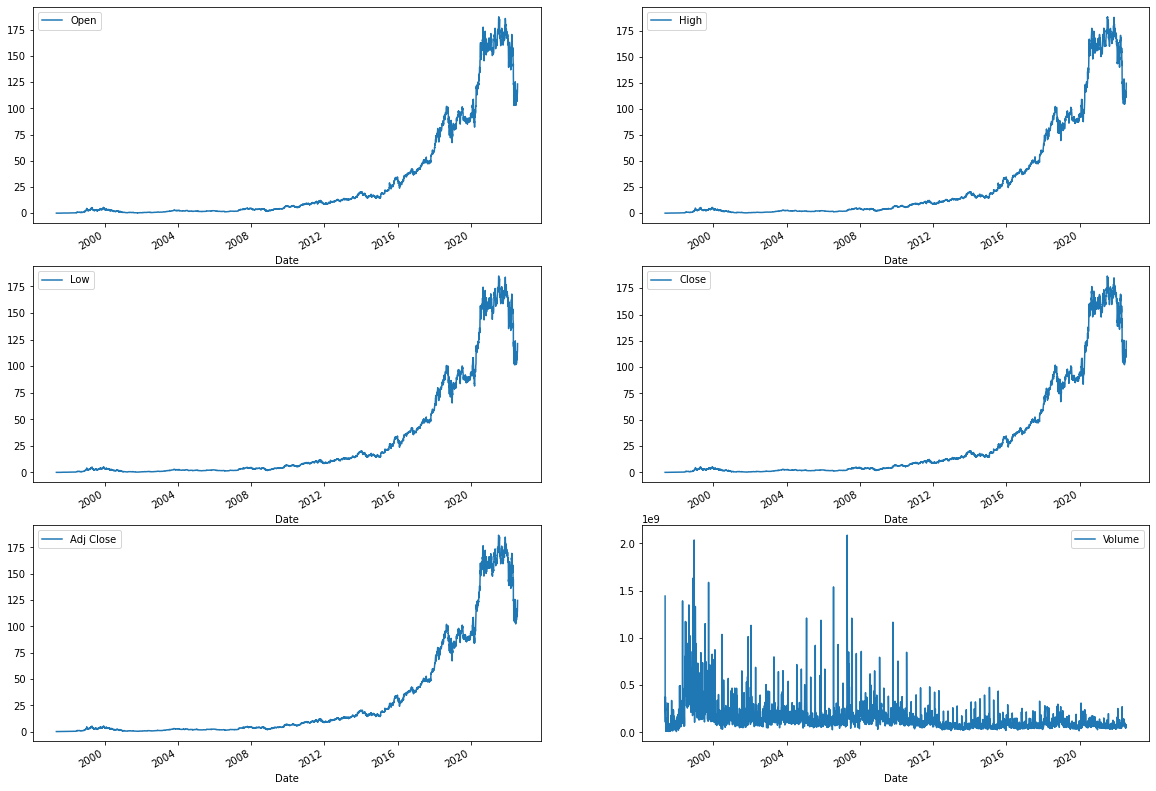

In [538]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_figheight(15)
fig.set_figwidth(20)
c=0
print('-------------------------------------------------------------------------------------------------------------------------------')
for i in range(3):
    df.plot(y=df.columns[c],ax=axes[i][0])
    df.plot(y=df.columns[c+1],ax=axes[i][1])
    c=c+2







## Pair Plot between Each Features

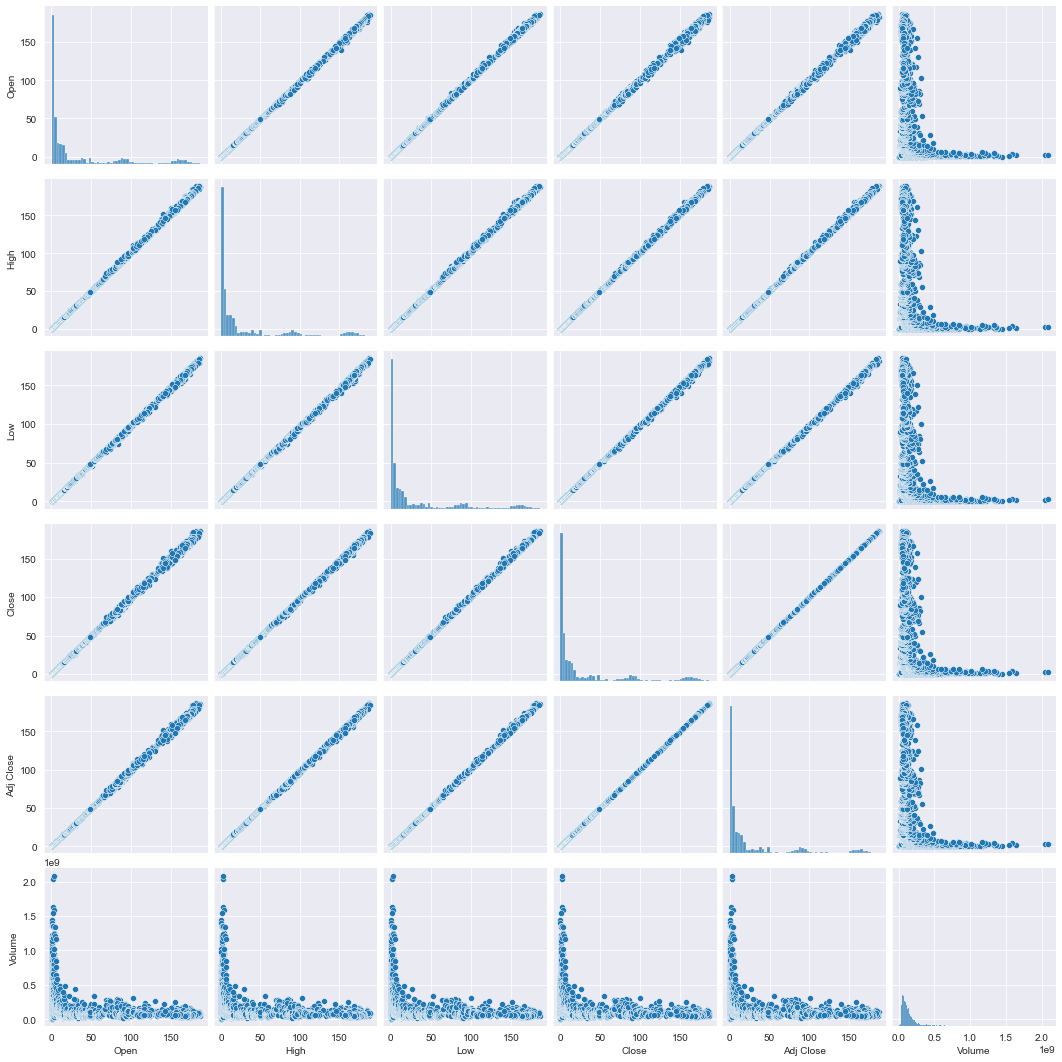

In [381]:
sns.pairplot(df)

## Function for Generating Plots between any Features of the Data Frame

-------------------------------------------------------------------------------------------------------------------------------


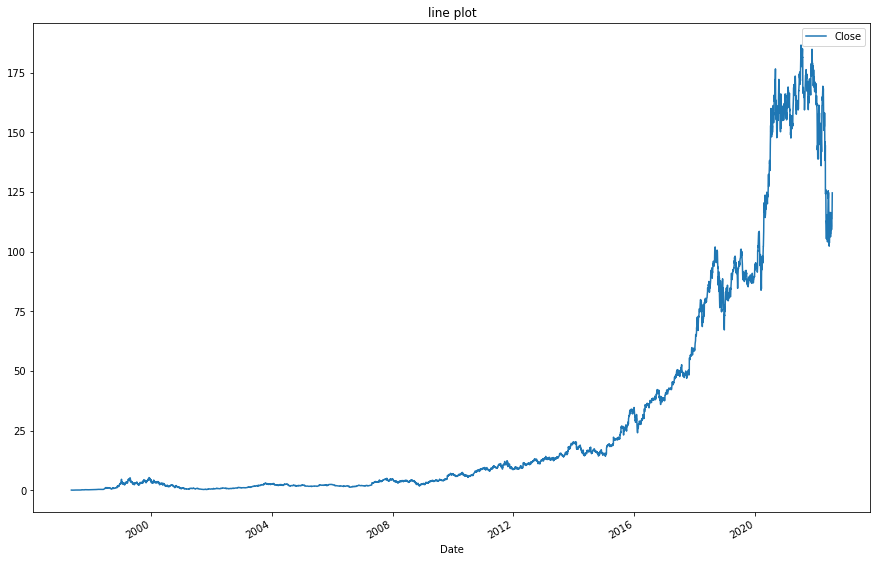

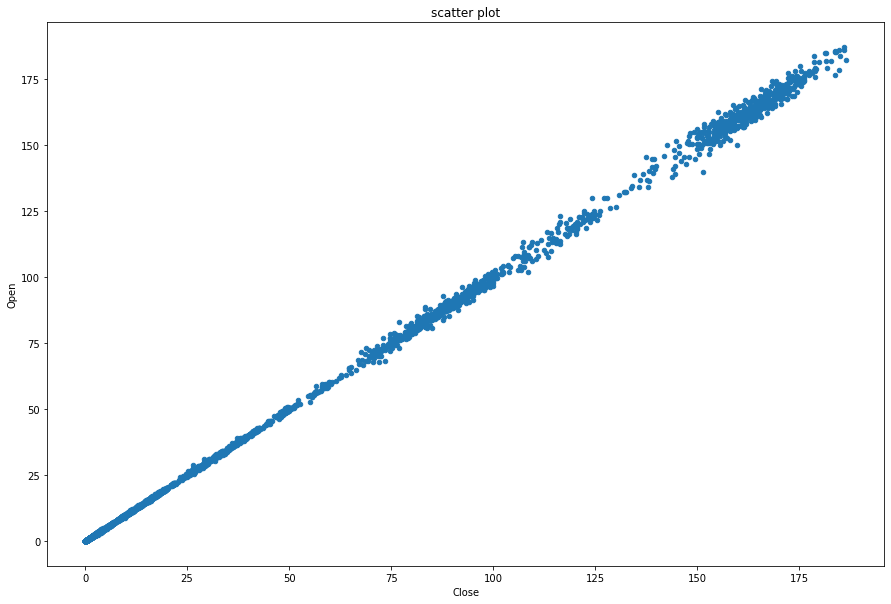

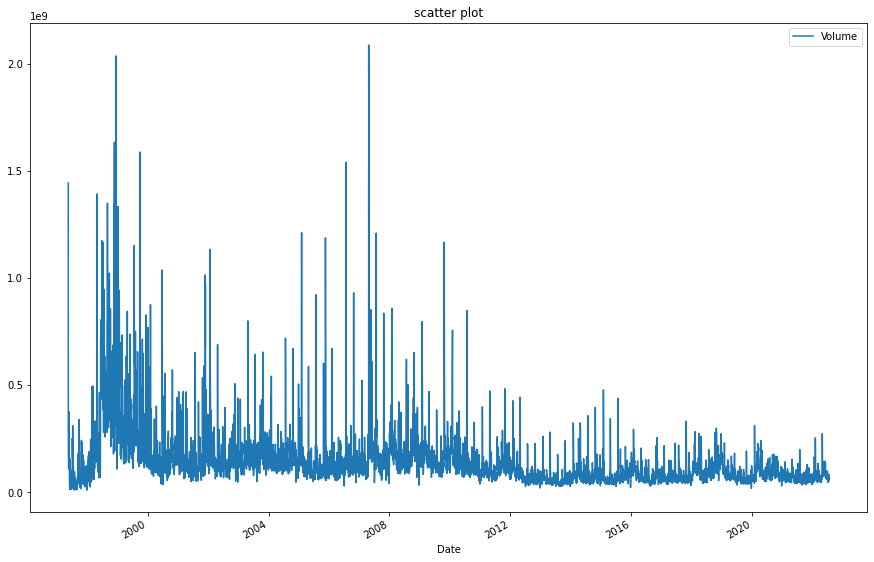

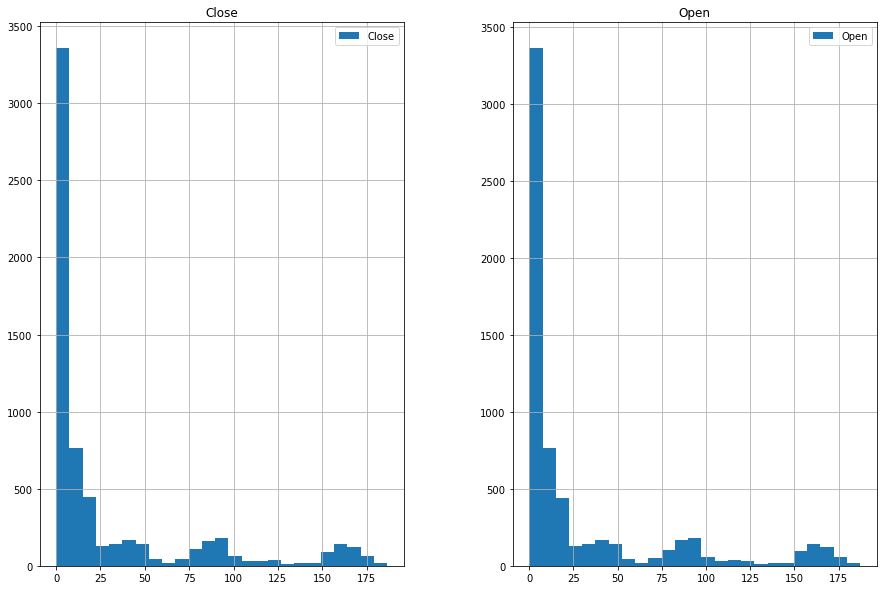

In [568]:
def plot_df(x,y,kind):   #kind = scatter, line, hist , (hist will generate 2 plot)
    if x=='Date':
        df.plot(y=y,figsize=(15,10),title=kind + ' plot')
    elif kind=='hist':
        df.hist(column=[x,y],bins=25,figsize=(15,10),legend=True)
    else:
        df.plot(x=x, y=y,kind=kind,figsize=(15,10), title=kind + ' plot')

print('-------------------------------------------------------------------------------------------------------------------------------')

plot_df('Date','Close','line')
plot_df('Close','Open','scatter')
plot_df('Date','Volume','scatter')
plot_df('Close','Open','hist')






## Plot of Each Category - Open, High, Low, Close, Adj. Close, Volume with Time(Monthly)

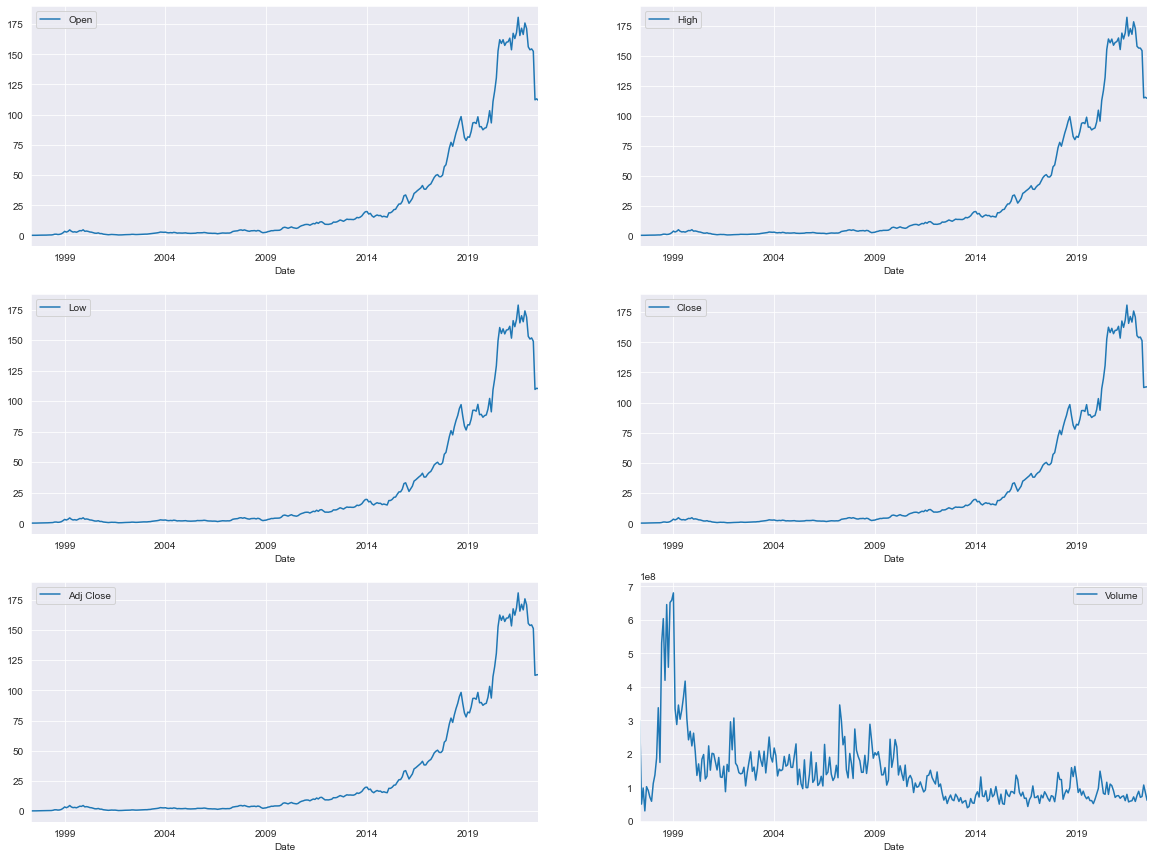

In [404]:
#month wise average Open. High, Low,...
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_figheight(15)
fig.set_figwidth(20)
c=0
for i in range(3):
    df.resample(rule='BM').mean().plot(y=df.columns[c],ax=axes[i][0])
    df.resample(rule='BM').mean().plot(y=df.columns[c+1],ax=axes[i][1])
    c=c+2



## Plot of Each Category - Open, High, Low, Close, Adj. Close, Volume with Time(Yealy)

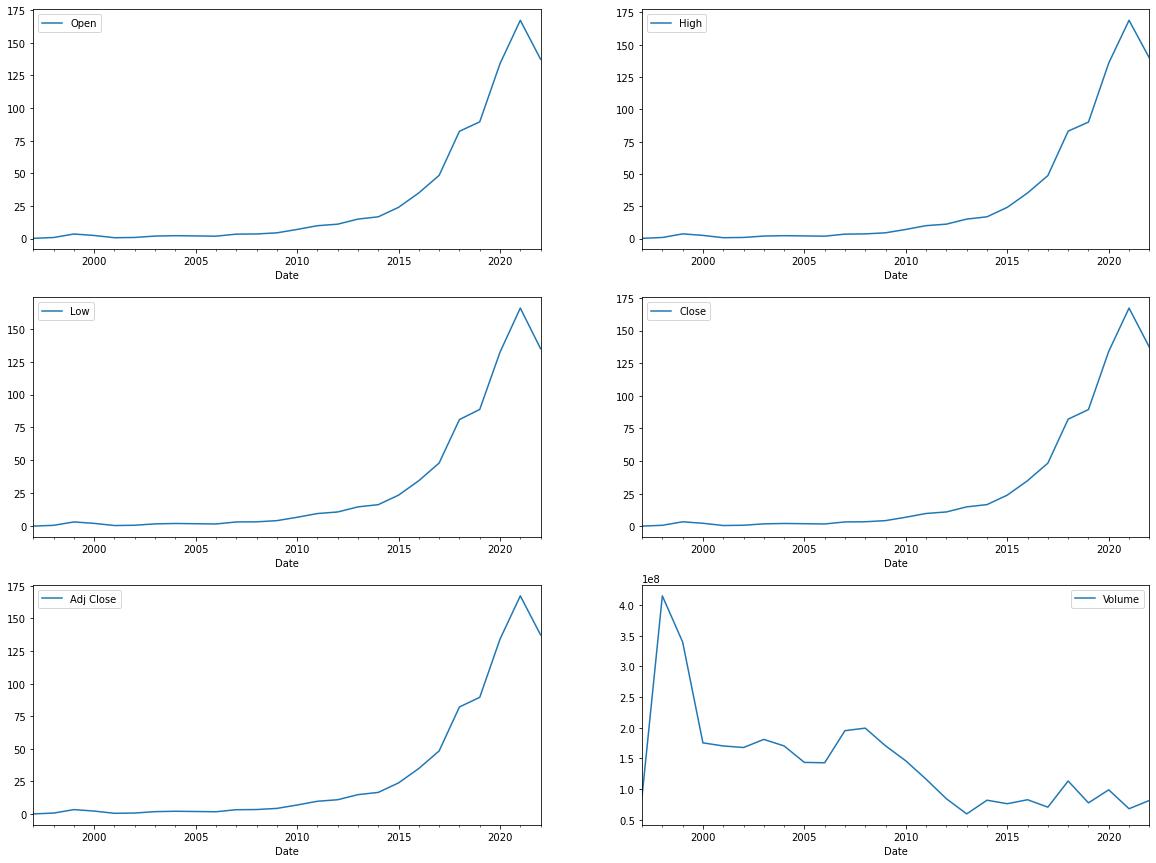

In [8]:
#year wise average data
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_figheight(15)
fig.set_figwidth(20)
c=0
for i in range(3):
    df.resample(rule='BY').mean().plot(y=df.columns[c],ax=axes[i][0])
    df.resample(rule='BY').mean().plot(y=df.columns[c+1],ax=axes[i][1])
    c=c+2



## We can clearly observe that there is rise in the market from some where between 2004 and 2009 (~2006 most probably).

-------------------------------------------------------------------------------------------------------------------------------


<AxesSubplot:xlabel='Date'>

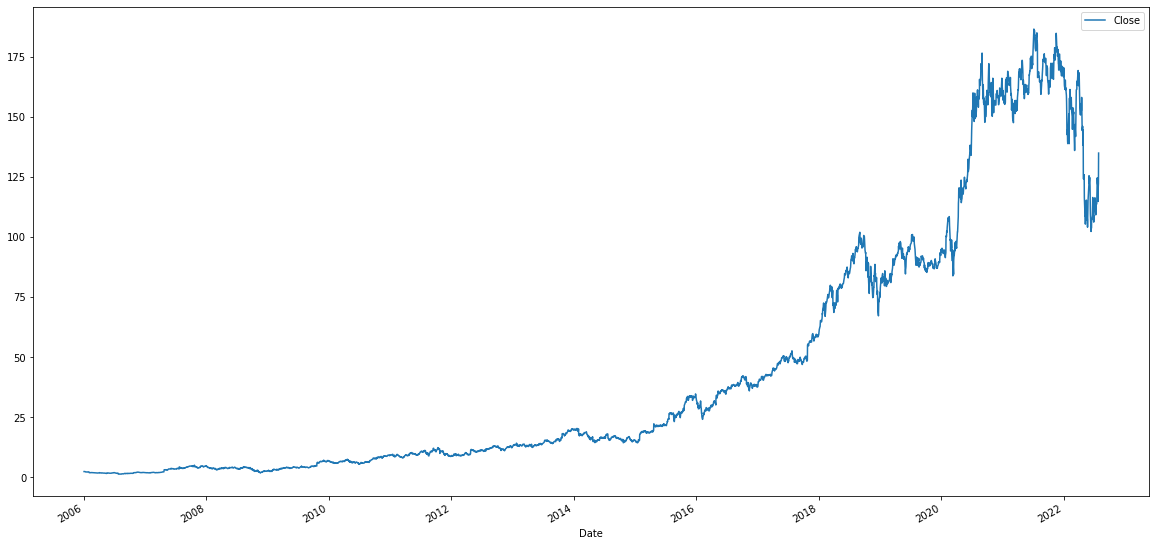

In [8]:
df1=df.loc['2006-01-01':]
print('-------------------------------------------------------------------------------------------------------------------------------')
df1.plot(y='Close',figsize=(20,10))


## Plot for Close Category along with Moving Average of 50, 100 and 200.

-------------------------------------------------------------------------------------------------------------------------------


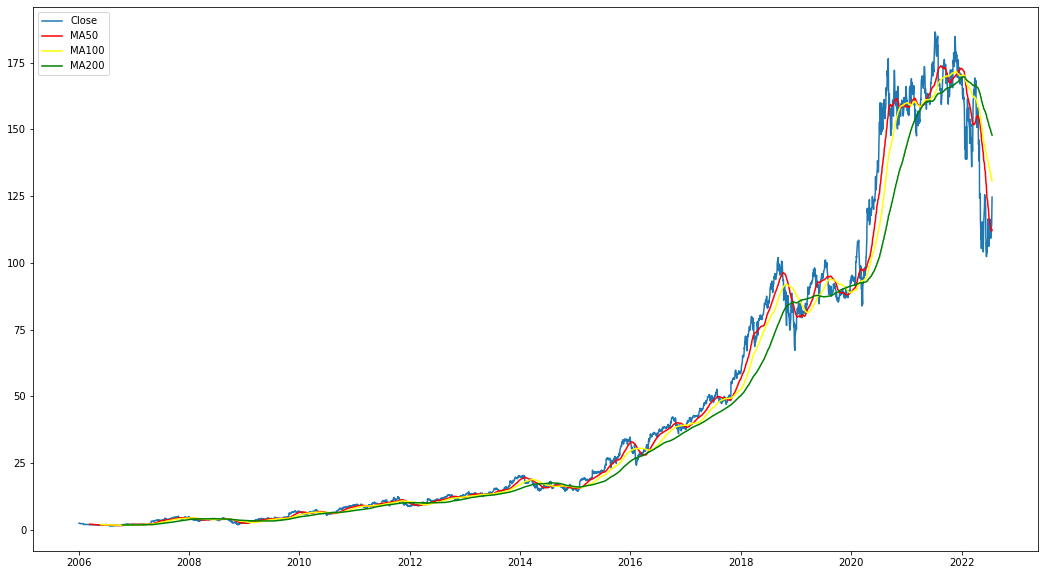

In [571]:
#moving averages for Close with window length 50,100 and 200
ma50=df1.Close.rolling(50).mean()
ma100=df1.Close.rolling(100).mean()
ma200=df1.Close.rolling(200).mean()

print('-------------------------------------------------------------------------------------------------------------------------------')

plt.figure(figsize=(18,10))
plt.plot(df1.Close)
plt.plot(ma50, color='red')
plt.plot(ma100, color='yellow')
plt.plot(ma200, color='green')
plt.legend(['Close','MA50','MA100','MA200'])




# Data Pre Processing and Model for Predicting Closing Price

## Data Preparation

### Feature Selection : We will be using 100 previous closing prices to predict the current one.

In [9]:
#creating a dataframe with pass 100 Closing price(Close 1 to Close 100) along with the target closing price('Close')
data=pd.DataFrame(df1.Close)
for i in range(1,101):
    string='Close {}'
    data[string.format(i)]= data['Close'].shift(+(101-i))
print('-------------------------------------------------------------------------------------------------------------------------------')
display(data)
print('-------------------------------------------------------------------------------------------------------------------------------')


-------------------------------------------------------------------------------------------------------------------------------


C:\Users\rvask\AppData\Local\Temp\ipykernel_23108\214936272.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[string.format(i)]= data['Close'].shift(+(101-i))


,Close,Close 1,Close 2,Close 3,Close 4,Close 5,Close 6,Close 7,Close 8,Close 9,...,Close 91,Close 92,Close 93,Close 94,Close 95,Close 96,Close 97,Close 98,Close 99,Close 100
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-03,2.379000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,2.362500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.379000
2006-01-05,2.382500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.379000,2.362500
2006-01-06,2.393500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.379000,2.362500,2.382500
2006-01-09,2.354000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.379000,2.362500,2.382500,2.393500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,121.139999,151.141998,152.052505,147.898499,145.641006,137.453003,136.014496,139.279007,146.817505,145.524506,...,111.750000,109.220001,110.400002,110.629997,113.550003,113.760002,118.209999,122.769997,124.629997,122.419998
2022-07-26,114.809998,152.052505,147.898499,145.641006,137.453003,136.014496,139.279007,146.817505,145.524506,141.852997,...,109.220001,110.400002,110.629997,113.550003,113.760002,118.209999,122.769997,124.629997,122.419998,121.139999
2022-07-27,120.970001,147.898499,145.641006,137.453003,136.014496,139.279007,146.817505,145.524506,141.852997,147.366501,...,110.400002,110.629997,113.550003,113.760002,118.209999,122.769997,124.629997,122.419998,121.139999,114.809998


-------------------------------------------------------------------------------------------------------------------------------


## We can observe the presence of NaN values, hence we will drop all those rows.

In [10]:
data.dropna(axis=0,inplace=True)
colm=data.columns
print('-------------------------------------------------------------------------------------------------------------------------------')
display(data)
print('-------------------------------------------------------------------------------------------------------------------------------')


-------------------------------------------------------------------------------------------------------------------------------


,Close,Close 1,Close 2,Close 3,Close 4,Close 5,Close 6,Close 7,Close 8,Close 9,...,Close 91,Close 92,Close 93,Close 94,Close 95,Close 96,Close 97,Close 98,Close 99,Close 100
Date,,,,,,,,,,,,,,,,,,,,,
2006-05-26,1.803500,2.379000,2.362500,2.382500,2.393500,2.354000,2.282500,2.246500,2.218000,2.220000,...,1.636500,1.639000,1.638000,1.580500,1.630500,1.697000,1.741500,1.688000,1.759500,1.781500
2006-05-30,1.732000,2.362500,2.382500,2.393500,2.354000,2.282500,2.246500,2.218000,2.220000,2.200000,...,1.639000,1.638000,1.580500,1.630500,1.697000,1.741500,1.688000,1.759500,1.781500,1.803500
2006-05-31,1.730500,2.382500,2.393500,2.354000,2.282500,2.246500,2.218000,2.220000,2.200000,2.216000,...,1.638000,1.580500,1.630500,1.697000,1.741500,1.688000,1.759500,1.781500,1.803500,1.732000
2006-06-01,1.753500,2.393500,2.354000,2.282500,2.246500,2.218000,2.220000,2.200000,2.216000,2.222500,...,1.580500,1.630500,1.697000,1.741500,1.688000,1.759500,1.781500,1.803500,1.732000,1.730500
2006-06-02,1.738000,2.354000,2.282500,2.246500,2.218000,2.220000,2.200000,2.216000,2.222500,2.196000,...,1.630500,1.697000,1.741500,1.688000,1.759500,1.781500,1.803500,1.732000,1.730500,1.753500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,121.139999,151.141998,152.052505,147.898499,145.641006,137.453003,136.014496,139.279007,146.817505,145.524506,...,111.750000,109.220001,110.400002,110.629997,113.550003,113.760002,118.209999,122.769997,124.629997,122.419998
2022-07-26,114.809998,152.052505,147.898499,145.641006,137.453003,136.014496,139.279007,146.817505,145.524506,141.852997,...,109.220001,110.400002,110.629997,113.550003,113.760002,118.209999,122.769997,124.629997,122.419998,121.139999
2022-07-27,120.970001,147.898499,145.641006,137.453003,136.014496,139.279007,146.817505,145.524506,141.852997,147.366501,...,110.400002,110.629997,113.550003,113.760002,118.209999,122.769997,124.629997,122.419998,121.139999,114.809998


-------------------------------------------------------------------------------------------------------------------------------


## Linear and Ensemble Models

### Train-Test Split

In [11]:
train=data.loc['2006-05-25':'2016-12-30']
test=data.loc['2017-01-03':]


### Feature Scaling

In [12]:
#training data
#-----------------------------------------------------------------------------------------------------------------------
train=pd.DataFrame(scaler.fit_transform(train),columns=train.columns,index=train.index)
y_train=train.Close.values
train.drop('Close',axis=1,inplace=True)
X_train=train.values

#testing data
#-----------------------------------------------------------------------------------------------------------------------
y_test=pd.DataFrame(test.Close)
test.drop('Close',axis=1,inplace=True)
test=pd.DataFrame(scaler.fit_transform(test),columns=test.columns,index=test.index)
X_test=test.values



C:\Users\rvask\AppData\Local\Temp\ipykernel_23108\487155531.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('Close',axis=1,inplace=True)


### Fitting the Model

In [13]:
Lr,Rd,Rf,Ad=LinearRegression(),Ridge(),RandomForestRegressor(),AdaBoostRegressor()
Lr,Rd,Rf,Ad=Lr.fit(X_train,y_train), Rd.fit(X_train,y_train), Rf.fit(X_train,y_train), Ad.fit(X_train,y_train)
print('-------------------------------------------------------------------------------')
y_testt=scaler.fit_transform(y_test)
print("R^2 for Linear Regression----",Lr.score(X_test,y_testt))
print('-------------------------------------------------------------------------------')
print("R^2 for Ridge Regression----",Rd.score(X_test,y_testt))
print('-------------------------------------------------------------------------------')
print("R^2 for Random Forest Regression----",Rf.score(X_test,y_testt))
print('-------------------------------------------------------------------------------')
print("R^2 for AdaBoost Regression----",Ad.score(X_test,y_testt))
print('-------------------------------------------------------------------------------')



-------------------------------------------------------------------------------
R^2 for Linear Regression---- 0.9965087658163201
-------------------------------------------------------------------------------
R^2 for Ridge Regression---- 0.9935424310296799
-------------------------------------------------------------------------------
R^2 for Random Forest Regression---- 0.9915150179050484
-------------------------------------------------------------------------------
R^2 for AdaBoost Regression---- 0.9928217623563681
-------------------------------------------------------------------------------


### Model Results

In [885]:
X_train.shape

(2669, 100)

In [886]:
data.shape[0]-y_test.shape[0]

2669

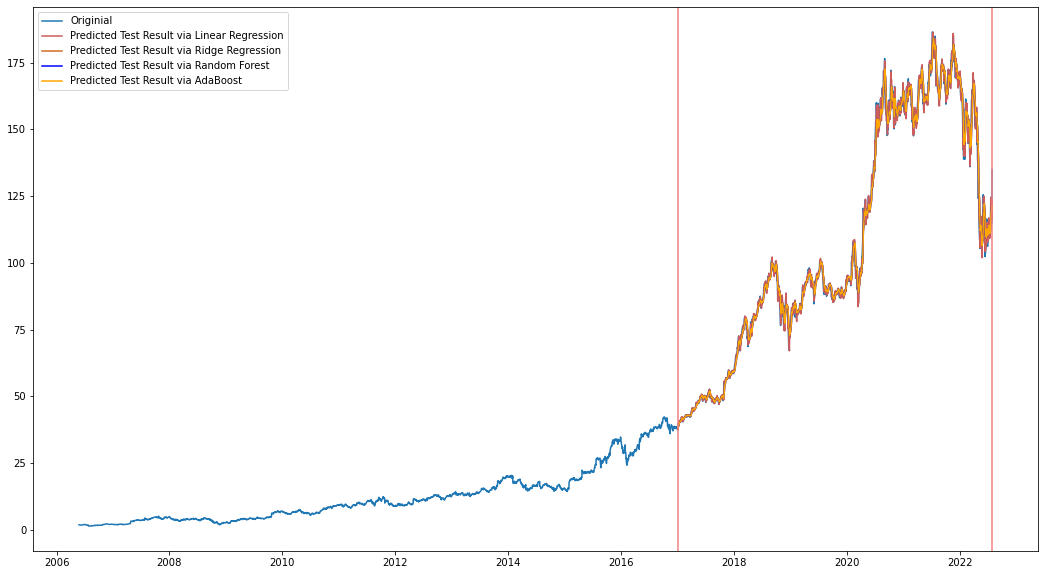

In [14]:
y_lr=Lr.predict(X_test)
y_rd=Rd.predict(X_test)
y_rf=Rd.predict(X_test)
y_ad=Rd.predict(X_test)

y_lr=scaler.inverse_transform([y_lr])
y_rd=scaler.inverse_transform([y_rd])
y_rf=scaler.inverse_transform([y_rf])
y_ad=scaler.inverse_transform([y_ad])

plt.figure(figsize=(18,10))
plt.plot(data.Close,'tab:blue')
plt.plot(data.index[data.shape[0]-y_test.shape[0]:],y_lr[0],'indianred')
plt.plot(data.index[data.shape[0]-y_test.shape[0]:],y_rd[0],'chocolate')
plt.plot(data.index[data.shape[0]-y_test.shape[0]:],y_rf[0],'blue')
plt.plot(data.index[data.shape[0]-y_test.shape[0]:],y_ad[0],'orange')

plt.axvline(x=data.index[data.shape[0]-y_test.shape[0]],color='lightcoral')
plt.axvline(x=data.index[-1],color='lightcoral')
plt.legend(['Originial','Predicted Test Result via Linear Regression','Predicted Test Result via Ridge Regression','Predicted Test Result via Random Forest','Predicted Test Result via AdaBoost'])





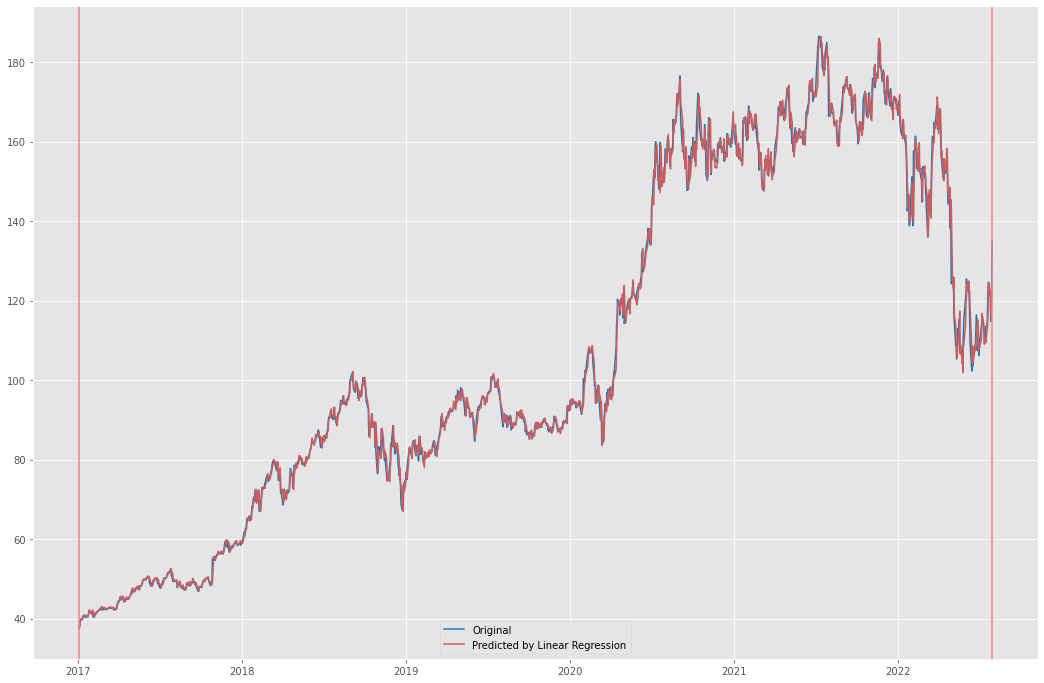

In [102]:
plt.figure(figsize=(18,12))
plt.plot(data.index[2669:],y_test.values,'tab:blue')
plt.plot(data.index[2669:],y_lr[0],'indianred')
plt.axvline(x=data.index[2669],color='lightcoral')
plt.axvline(x=data.index[-1],color='lightcoral')
plt.legend(['Original','Predicted by Linear Regression'])

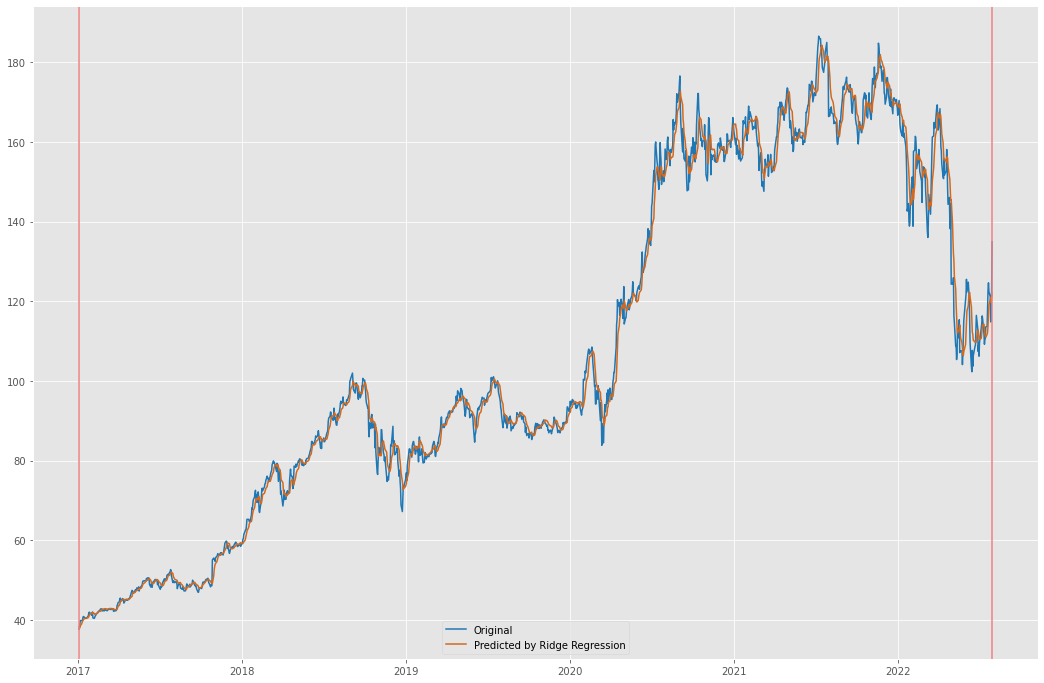

In [103]:
plt.figure(figsize=(18,12))
plt.plot(data.index[2669:],y_test.values,'tab:blue')
plt.plot(data.index[2669:],y_rd[0],'chocolate')
plt.axvline(x=data.index[2669],color='lightcoral')
plt.axvline(x=data.index[-1],color='lightcoral')
plt.legend(['Original','Predicted by Ridge Regression'])

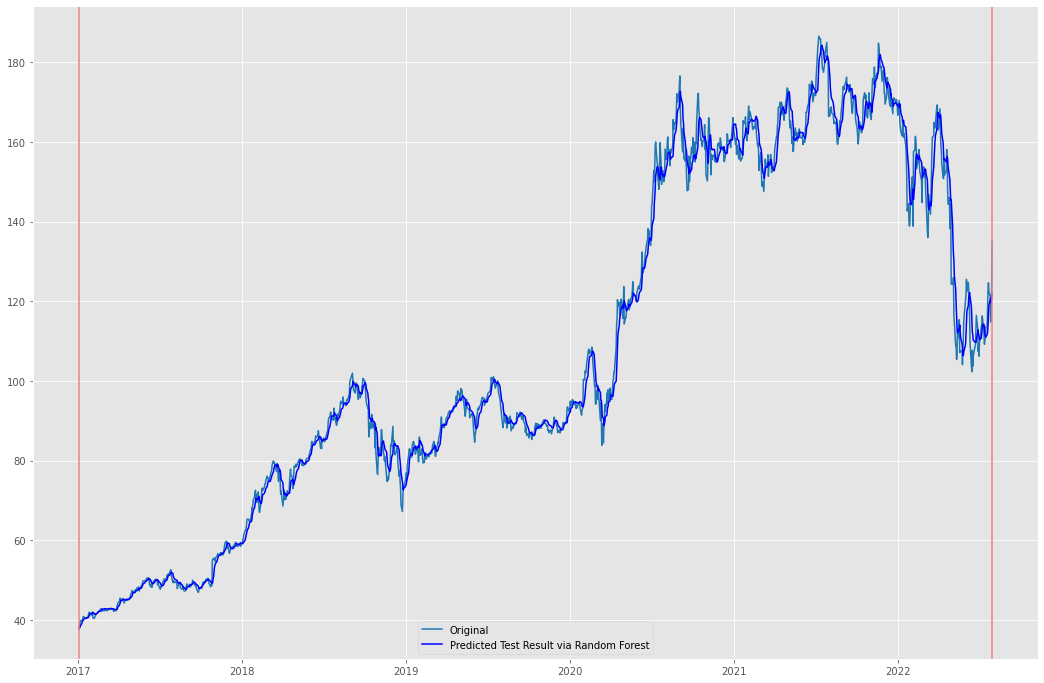

In [104]:
plt.figure(figsize=(18,12))
plt.plot(data.index[2669:],y_test.values,'tab:blue')
plt.plot(data.index[2669:],y_rf[0],'blue')
plt.axvline(x=data.index[2669],color='lightcoral')
plt.axvline(x=data.index[-1],color='lightcoral')
plt.legend(['Original','Predicted Test Result via Random Forest'])

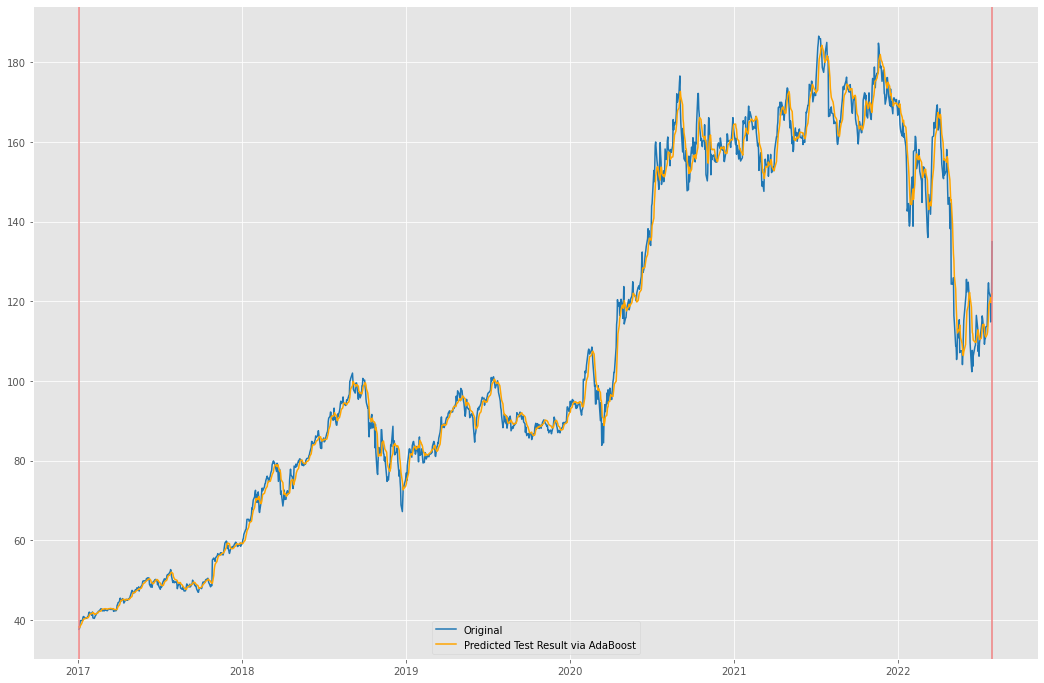

In [105]:
plt.figure(figsize=(18,12))
plt.plot(data.index[2669:],y_test.values,'tab:blue')
plt.plot(data.index[2669:],y_ad[0],'orange')
plt.axvline(x=data.index[2669],color='lightcoral')
plt.axvline(x=data.index[-1],color='lightcoral')
plt.legend(['Original','Predicted Test Result via AdaBoost'])

<AxesSubplot:xlabel='Features'>

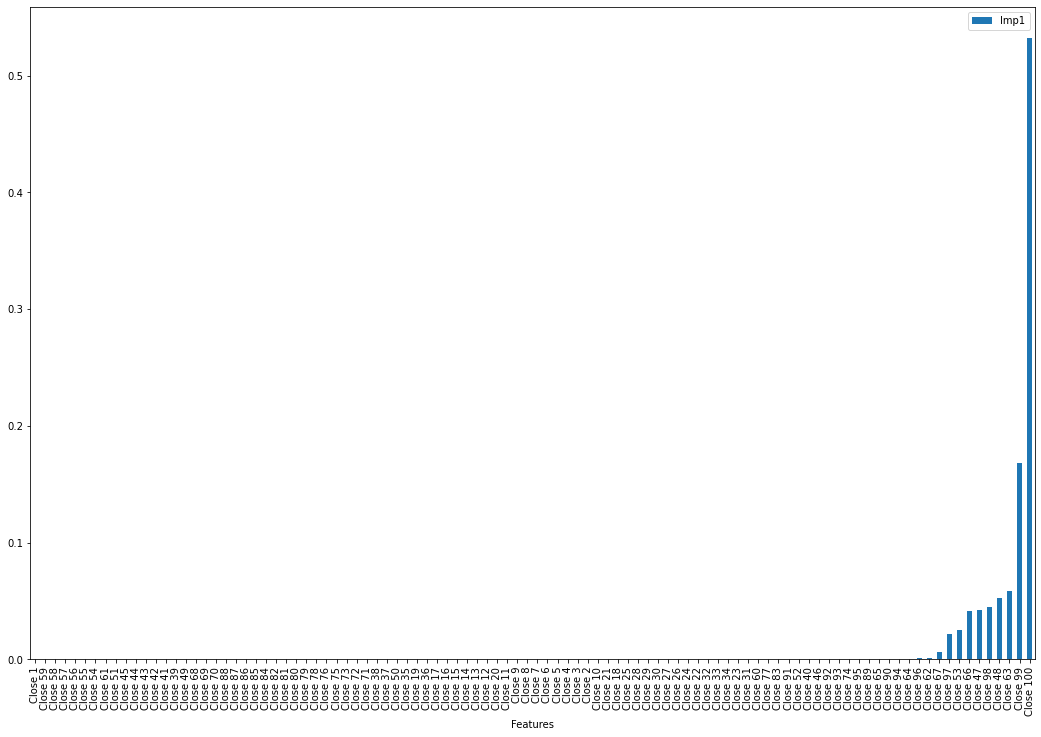

In [48]:
k=Ad.feature_importances_
fa=pd.DataFrame({'Features':train.columns,'Imp1':k })
fa.set_index('Features',inplace=True)
faa=fa.sort_values('Imp1',ascending=True).copy()
faa.plot(kind='bar',figsize=(18,12))

<AxesSubplot:xlabel='Features'>

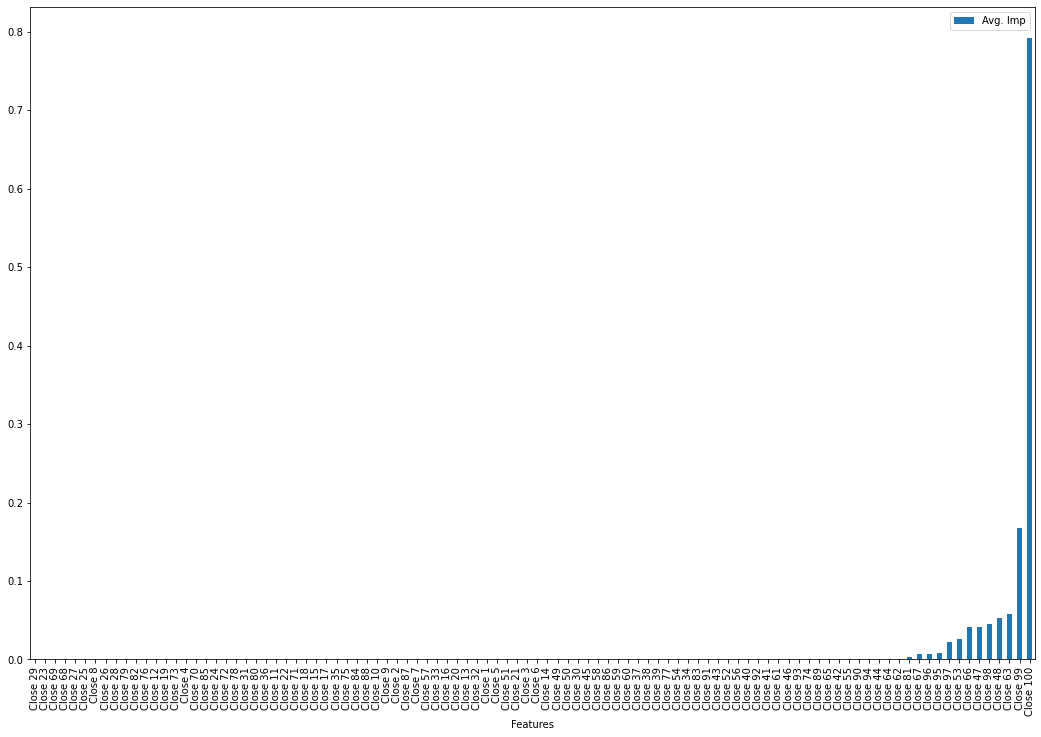

In [49]:
dt=fa.merge(fr,on='Features')
dt['Avg. Imp']=dt.max(axis=1)
dtt=dt.sort_values('Avg. Imp',ascending=True).copy()
dtt.plot(y='Avg. Imp',kind='bar',figsize=(18,12))

### Tomorrow's Prediction

In [261]:
yp=y_testt.flatten()
yp

array([0.        , 0.00117876, 0.0089934 , ..., 0.55939407, 0.56819267,
       0.65329075])

In [274]:
print("By Linear Regression----",scaler.inverse_transform([Lr.predict([yp[-100:]])]))
print('-------------------------------------------------------------------------------')
print("By Ridge Regression----",scaler.inverse_transform([Rd.predict([yp[-100:]])]))
print('-------------------------------------------------------------------------------')
print("By Random Forest Regression----",scaler.inverse_transform([Rf.predict([yp[-100:]])]))
print('-------------------------------------------------------------------------------')
print("By AdaBoost Regression----",scaler.inverse_transform([Ad.predict([yp[-100:]])]))
print('-------------------------------------------------------------------------------')




By Linear Regression---- [[135.66334303]]
-------------------------------------------------------------------------------
By Ridge Regression---- [[126.29599186]]
-------------------------------------------------------------------------------
By Random Forest Regression---- [[136.13055962]]
-------------------------------------------------------------------------------
By AdaBoost Regression---- [[134.59207425]]
-------------------------------------------------------------------------------


## LSTM Model

### i) Training with last 100 stock prices.

### Train-Val-Test Split

In [83]:
train=data.loc['2006-05-25':'2016-12-30']
val=data.loc['2017-01-03':'2020-01-03']
test=data.loc['2020-01-04':]


### Feature Scaling

In [799]:
#training data
#-----------------------------------------------------------------------------------------------------------------------
train=pd.DataFrame(scaler.fit_transform(train),columns=train.columns,index=train.index)
y_train=train.Close.values
train.drop('Close',axis=1,inplace=True)
X_train=train.values

#validation data
#-----------------------------------------------------------------------------------------------------------------------
val=pd.DataFrame(scaler.fit_transform(val),columns=val.columns,index=val.index)
y_val=val.Close.values
val.drop('Close',axis=1,inplace=True)
X_val=val.values

#testing data
#-----------------------------------------------------------------------------------------------------------------------
y_test=pd.DataFrame(test.Close)
test.drop('Close',axis=1,inplace=True)
test=pd.DataFrame(scaler.fit_transform(test),columns=test.columns,index=test.index)
X_test=test.values



C:\Users\rvask\AppData\Local\Temp\ipykernel_23300\4116476405.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('Close',axis=1,inplace=True)


In [747]:
X_train.shape,X_val.shape,X_test.shape,y_train.shape,y_val.shape


((2669, 100), (756, 100), (641, 100), (2669,), (756,))

### Fitting the Model

In [748]:
model=Sequential()
model.add(LSTM(200,activation='tanh',return_sequences=True,input_shape=(100,1)))
model.add(Dropout(0.1))
model.add(LSTM(200,activation='tanh',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(250,activation='tanh',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(250,activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.0001),loss='mean_squared_error',metrics='mean_squared_error')
model.summary()

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_159 (LSTM)             (None, 100, 200)          161600    
                                                                 
 dropout_157 (Dropout)       (None, 100, 200)          0         
                                                                 
 lstm_160 (LSTM)             (None, 100, 200)          320800    
                                                                 
 dropout_158 (Dropout)       (None, 100, 200)          0         
                                                                 
 lstm_161 (LSTM)             (None, 100, 250)          451000    
                                                                 
 dropout_159 (Dropout)       (None, 100, 250)          0         
                                                                 
 lstm_162 (LSTM)             (None, 250)             

In [749]:
history=model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=200)

Epoch 1/200
84/84 [==============================] - 12s 73ms/step - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 2/200
84/84 [==============================] - 4s 48ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0064 - val_mean_squared_error: 0.0064
Epoch 3/200
84/84 [==============================] - 4s 47ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 4/200
84/84 [==============================] - 4s 44ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 5/200
84/84 [==============================] - 4s 49ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 6/200
84/84 [==============================] - 4s 46ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 7/200
84/84 [========

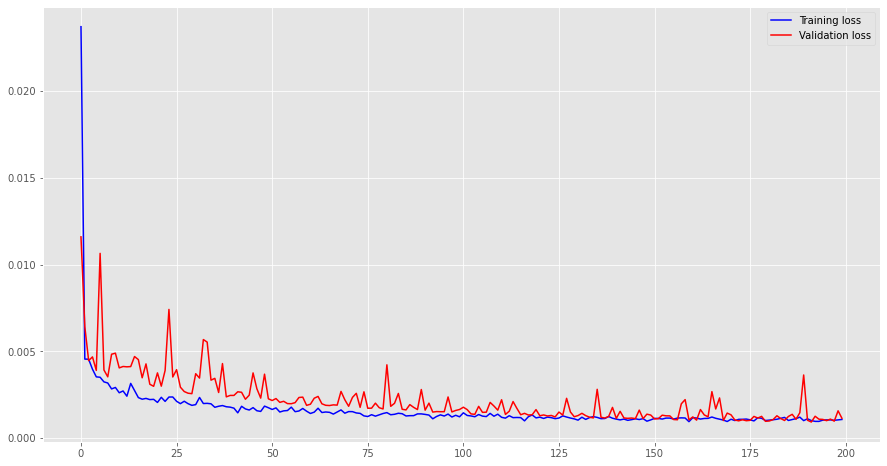

In [750]:
plt.figure(figsize=(15,8))
plt.style.use("ggplot")
plt.plot(history.history['loss'], color='b', label="Training loss")
plt.plot(history.history['val_loss'], color='r', label="Validation loss")
plt.legend()


### Model Results

In [800]:
y_pred=model.predict(X_test)
print('-------------------------------------------------------------------------------')
y_testt=scaler.fit_transform(y_test)
print("R^2 for LSTM Model----",r2_score(y_pred,y_testt))
print('-------------------------------------------------------------------------------')

21/21 [==============================] - 1s 35ms/step
-------------------------------------------------------------------------------
R^2 for LSTM Model---- 0.9570879458791254
-------------------------------------------------------------------------------


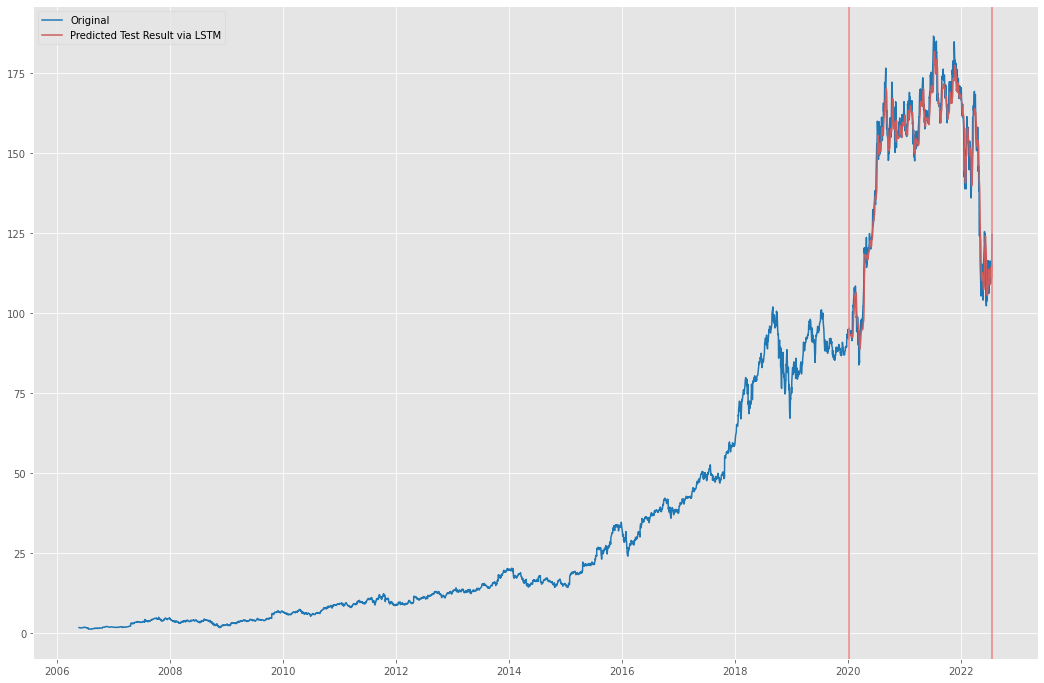

In [801]:
y_lstm=scaler.inverse_transform(y_pred)
plt.figure(figsize=(18,12))
plt.plot(data.Close,'tab:blue')
plt.plot(data.index[3425:],y_lstm,'indianred')
plt.axvline(x=data.index[3425],color='lightcoral')
plt.axvline(x=data.index[-1],color='lightcoral')
plt.legend(['Original','Predicted Test Result via LSTM'])


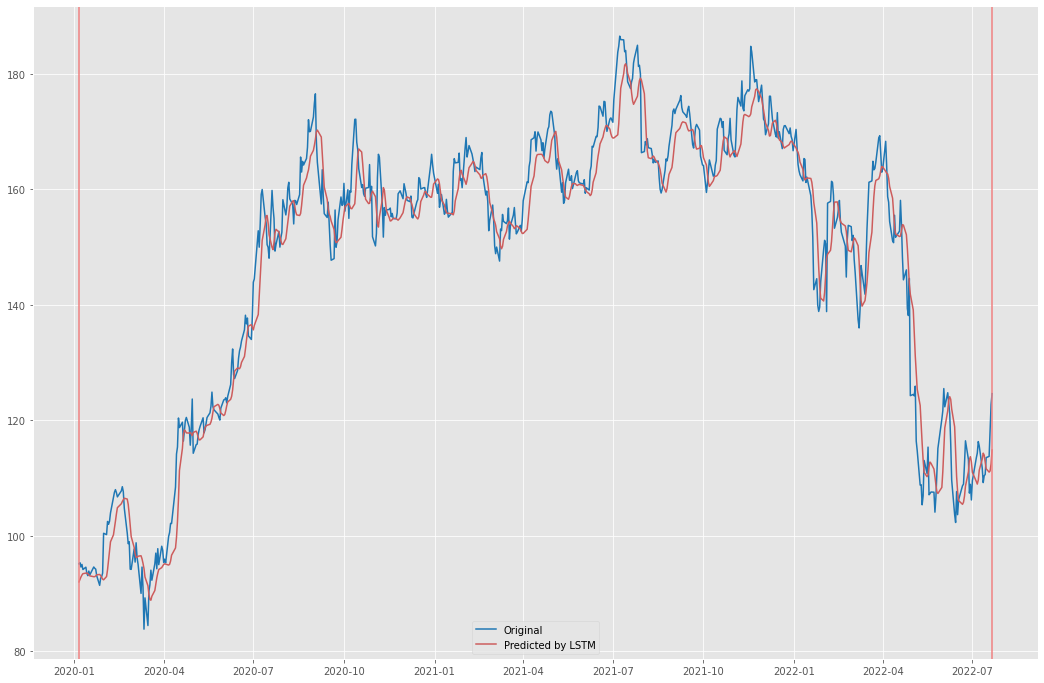

In [802]:
plt.figure(figsize=(18,12))
plt.plot(data.index[3425:],y_test.values,'tab:blue')
plt.plot(data.index[3425:],y_lstm,'indianred')
plt.axvline(x=data.index[3425],color='lightcoral')
plt.axvline(x=data.index[-1],color='lightcoral')
plt.legend(['Original','Predicted by LSTM'])

### Saving the Model

In [761]:
model.save("LSTM.h5")  #keras.h5 format 


### Tomorrow's Prediction

In [ ]:
yp=y_testt.flatten()
yp
print("By LSTM----",scaler.inverse_transform([model.predict([yp[-100:]])]))
print('-------------------------------------------------------------------------------')




    


### ii) Training with last 3 stock prices

### Train-Val-Test Split

In [86]:
train=data.loc['2006-05-25':'2016-12-30']
val=data.loc['2017-01-03':'2020-01-03']
test=data.loc['2020-01-04':]
train=train[['Close','Close 98','Close 99','Close 100']]
val=val[['Close','Close 98','Close 99','Close 100']]
test=test[['Close','Close 98','Close 99','Close 100']]


### Feature Scaling

In [87]:
#training data
#-----------------------------------------------------------------------------------------------------------------------
train=pd.DataFrame(scaler.fit_transform(train),columns=train.columns,index=train.index)
y_train=train.Close.values
train.drop('Close',axis=1,inplace=True)
X_train=train.values

#validation data
#-----------------------------------------------------------------------------------------------------------------------
val=pd.DataFrame(scaler.fit_transform(val),columns=val.columns,index=val.index)
y_val=val.Close.values
val.drop('Close',axis=1,inplace=True)
X_val=val.values

#testing data
#-----------------------------------------------------------------------------------------------------------------------
y_test=pd.DataFrame(test.Close)
test.drop('Close',axis=1,inplace=True)
test=pd.DataFrame(scaler.fit_transform(test),columns=test.columns,index=test.index)
X_test=test.values

X_train.shape,X_val.shape,X_test.shape,y_train.shape,y_val.shape


((2669, 3), (756, 3), (647, 3), (2669,), (756,))

### Fitting the Model

In [88]:
model1=Sequential()
model1.add(LSTM(200,activation='tanh',return_sequences=True,input_shape=(X_train.shape[1],1)))
model1.add(Dropout(0.1))
model1.add(LSTM(200,activation='tanh',return_sequences=True))
model1.add(Dropout(0.3))
model1.add(LSTM(250,activation='tanh',return_sequences=True))
model1.add(Dropout(0.3))
model1.add(LSTM(250,activation='tanh'))
model1.add(Dropout(0.3))
model1.add(Dense(200,activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1))
model1.compile(optimizer=Adam(learning_rate=0.0001),loss='mean_squared_error',metrics='mean_squared_error')
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 3, 200)            161600    
                                                                 
 dropout_25 (Dropout)        (None, 3, 200)            0         
                                                                 
 lstm_21 (LSTM)              (None, 3, 200)            320800    
                                                                 
 dropout_26 (Dropout)        (None, 3, 200)            0         
                                                                 
 lstm_22 (LSTM)              (None, 3, 250)            451000    
                                                                 
 dropout_27 (Dropout)        (None, 3, 250)            0         
                                                                 
 lstm_23 (LSTM)              (None, 250)              

In [89]:
history1=model1.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=50)

Epoch 1/50
84/84 [==============================] - 10s 29ms/step - loss: 0.0734 - mean_squared_error: 0.0734 - val_loss: 0.0572 - val_mean_squared_error: 0.0572
Epoch 2/50
84/84 [==============================] - 1s 14ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 3/50
84/84 [==============================] - 1s 17ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 4/50
84/84 [==============================] - 1s 16ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 5/50
84/84 [==============================] - 1s 17ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 6/50
84/84 [==============================] - 2s 19ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 7/50
84/84 [===============

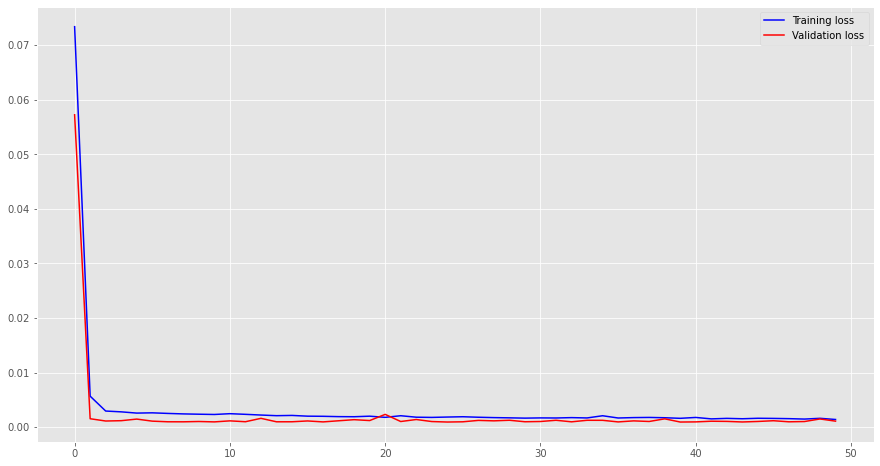

In [90]:
plt.figure(figsize=(15,8))
plt.style.use("ggplot")
plt.plot(history1.history['loss'], color='b', label="Training loss")
plt.plot(history1.history['val_loss'], color='r', label="Validation loss")
plt.legend()


### Model Results

In [91]:
y_pred=model1.predict(X_test)
print('-------------------------------------------------------------------------------')
y_testt=scaler.fit_transform(y_test)
print("R^2 for LSTM Model----",r2_score(y_pred,y_testt))
print('-------------------------------------------------------------------------------')

21/21 [==============================] - 1s 11ms/step
-------------------------------------------------------------------------------
R^2 for LSTM Model---- 0.9594872833790263
-------------------------------------------------------------------------------


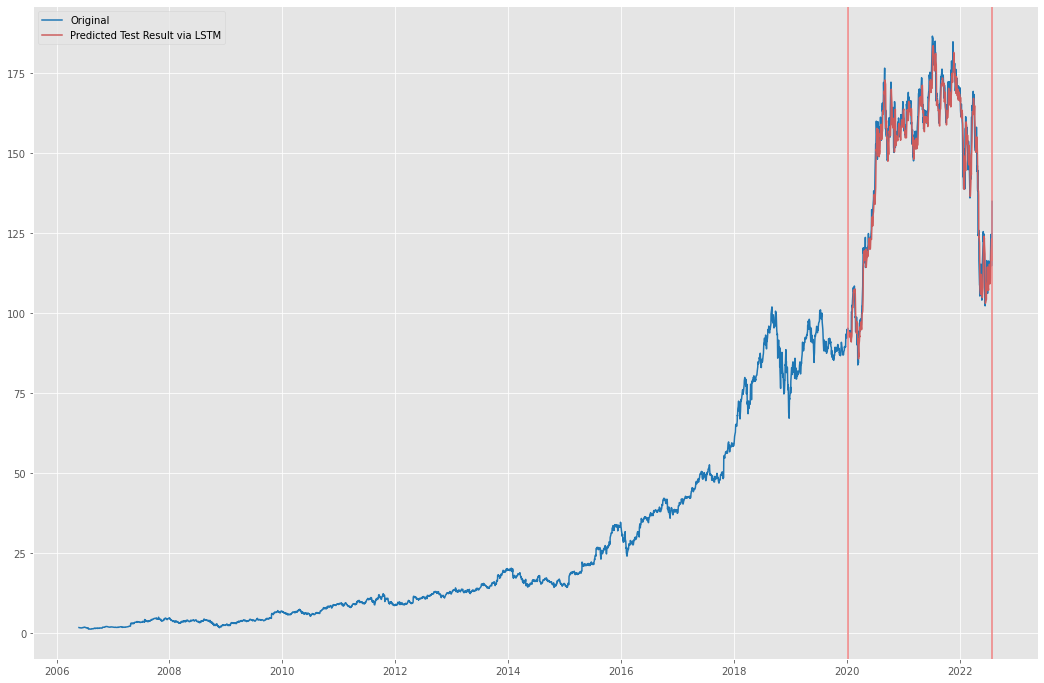

In [92]:
y_lstm=scaler.inverse_transform(y_pred)
plt.figure(figsize=(18,12))
plt.plot(data.Close,'tab:blue')
plt.plot(data.index[3425:],y_lstm,'indianred')
plt.axvline(x=data.index[3425],color='lightcoral')
plt.axvline(x=data.index[-1],color='lightcoral')
plt.legend(['Original','Predicted Test Result via LSTM'])


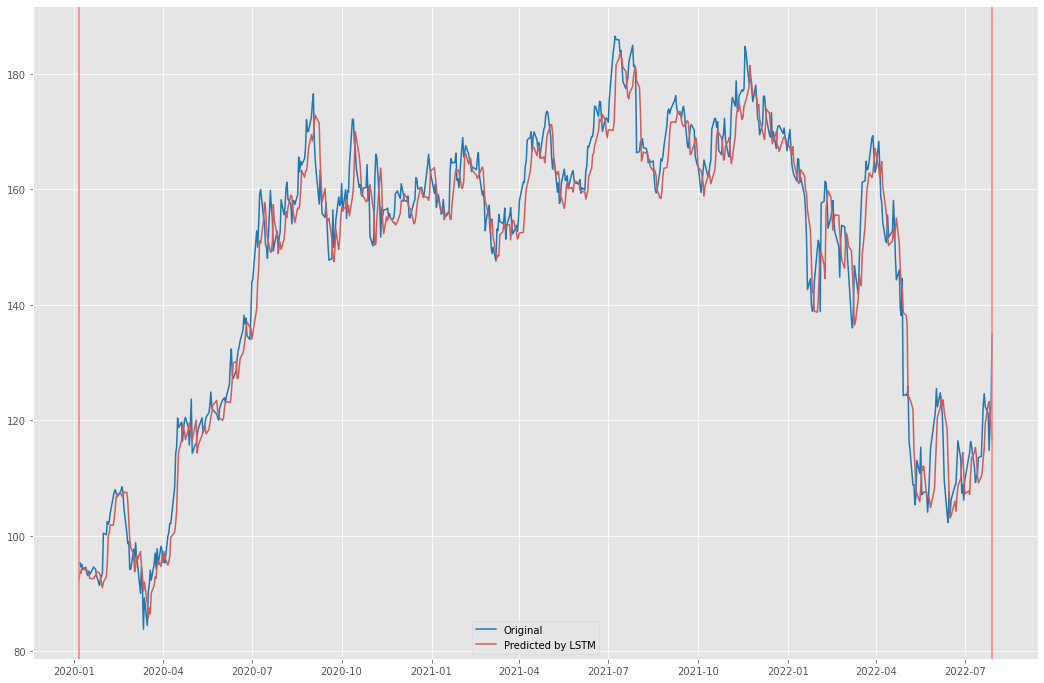

In [93]:
plt.figure(figsize=(18,12))
plt.plot(data.index[3425:],y_test.values,'tab:blue')
plt.plot(data.index[3425:],y_lstm,'indianred')
plt.axvline(x=data.index[3425],color='lightcoral')
plt.axvline(x=data.index[-1],color='lightcoral')
plt.legend(['Original','Predicted by LSTM'])

### Saving the model

In [94]:
model1.save("LSTM_F.h5")  #keras.h5 format 


### Tomorrow's Prediction

In [96]:
yp=y_testt.flatten()
yp
print("By LSTM----",scaler.inverse_transform(model1.predict([yp[-3:].tolist()]))[0][0])
print('-------------------------------------------------------------------------------')




    


1/1 [==============================] - 0s 38ms/step
By LSTM---- 121.8492
-------------------------------------------------------------------------------


### _Please don't try to implement this for investing in the stock market._

## ~ KripaNath (kripaa.nath@gmail.com)